<a href="https://colab.research.google.com/github/r-autowired/AIMLWorks/blob/main/Notes/NLP/W2_MLS_CaseStudy_News_Article_Categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<center><font size=10>Artificial Intelligence and Machine Learning</font></center>
<center><font size=6>Attention Mechanism and Transformers</font></center>


<center><font size=6>News Article Categorization</font></center>

## **Problem Statement**

### Business Context

In the dynamic landscape of the media and news industry, the ability to swiftly categorize and curate content has become a strategic imperative. The vast volume of information demands efficient systems to organize and present content to the audience.

The media industry, being the pulse of information dissemination, grapples with the continuous influx of news articles spanning diverse topics. Ensuring that the right articles reach the right audience promptly is not just a logistical necessity but a critical component in retaining and engaging audiences in an age of information overload.

Common Industry Challenges:
Amidst the ceaseless flow of news, organizations encounter challenges such as:
- Information Overload: The sheer volume of news articles makes manual categorization impractical.
- Timeliness: Delays in categorizing news articles can result in outdated or misplaced content.

### Problem Definition

E-news Express, a news aggregation startup, faces the challenge of categorizing the news articles collected. With news articles covering sports, entertainment, politics, and more, the need for an advanced and automated system to categorize them has become increasingly evident. The manual efforts required for categorizing such a diverse range of news articles are substantial, and human errors in the categorization of news articles can lead to reputational damage for the startup. There is also the factor of delays and potential inaccuracies. To streamline and optimize this process, the organization recognizes the imperative of adopting cutting-edge technologies, particularly machine learning, to automate and enhance the categorization of content.

As a data scientist on the E-news Express data team, the task is to analyze the text in news articles and build an unsupervised learning model for categorizing them. The categorization done by the model can then be validated against human-defined labels to check the overall accuracy of the AI system. The goal is to optimize the categorization process, ensuring timely and personalized delivery.

### Data Dictionary

- **Text**: The main body of the news article

## **Installing and importing the necessary libraries**

In [ ]:
# Installing the libraries with the specified versions
!pip install pandas==2.2.2 numpy==2.0.2 matplotlib==3.10.0 seaborn==0.13.2 scipy==1.15.3 scikit-learn==1.6.1 torch==2.6.0+cu124 sentence-transformers==4.1.0 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.3 MB/s eta 0:00:00


**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [ ]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to compute distances
from scipy.spatial.distance import cdist, pdist
from scipy.spatial import distance
from sklearn.metrics import silhouette_score

# importing the PyTorch Deep Learning library
import torch

# to import the model
from sentence_transformers import SentenceTransformer

# to cluster the data
from sklearn.cluster import KMeans

# to compute metrics
from sklearn.metrics import classification_report

# to avoid displaying unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## **Loading the dataset**

In [ ]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
reviews = pd.read_csv("/content/drive/MyDrive/AIML_UT/Colab_Files/Pi5_NLP/W2_Transformers/news_articles.csv")

In [ ]:
# creating a copy of the dataset
data = reviews.copy()

## **Data Overview**

### Checking the first five rows of the data

In [ ]:
# Print first 5 rows of data
data.head()

,Text
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n"
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the Royal Scots

In [ ]:
# checking a news article
data.loc[3, 'Text']

'Observers to monitor UK election\n \n Ministers will invite international observers to check the forthcoming UK general election is fairly run.\n \n The move comes amid claims the poll could be marred by electoral fraud. A report by two MPs committees called on Thursday for urgent changes to the electoral registration system to combat vote rigging and boost turnout. But in a written response to Labour MP Gordon Prentice, the government said it would normally invite observers to any UK election.\n \n Junior constitutional affairs minister Christopher Leslie said: "I fully expect us to repeat our previous practice of doing so once the date for the next general election is announced." The government has looked at ways of boosting voter turnout, which fell to 59% in the last general election in 2001.\n \n But trial all-postal ballots in four English regions last summer were hit by delays and some fraud allegations. Liberal Democrat peer Lord Greaves called last week for international obse

### Checking the shape of the dataset

In [ ]:
# print shape of data
data.shape

(2225, 1)

* The data comprises of ~2.2k news articles

### Checking for missing values

In [ ]:
# Check for missing values
data.isnull().sum()

,0
Text,0


- There are no mising values in the data

### Checking for duplicate values

In [ ]:
# Check for duplicate values
data.duplicated().sum()

np.int64(98)

- We'll drop the duplicate values in the data.

In [ ]:
data = data.drop_duplicates()

# resetting the dataframe index
data.reset_index(drop=True, inplace=True)

In [ ]:
data.duplicated().sum()

np.int64(0)

- There are no duplicate values in the data now.

## **Model Building**

### **Defining the model**

We'll be using the **all-MiniLM-L6-v2** model here.

💡 The **all-MiniLM-L6-v2** model is an all-round (**all**) model trained on a large and diverse dataset of over 1 billion training samples and generates state-of-the-art sentence embeddings of 384 dimensions.

📊  It is a language model (**LM**) that has 6 transformer encoder layers (**L6**) and is a smaller model (**Mini**) trained to mimic the performance of a larger model (BERT).

🛠️ Potential use-cases include text classification, sentiment analysis, and semantic search.

In [ ]:
#Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### **Encoding the dataset**

In [ ]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# encoding the dataset
embedding_matrix = model.encode(data['Text'], show_progress_bar=True, device=device)

Batches:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
# printing the shape of the embedding matrix
embedding_matrix.shape

(2127, 384)

- Each news article has been converted to a 384-dimensional vector

In [ ]:
# printing the embedding vector of the first review in the dataset
embedding_matrix[0]

array([ 1.44794332e-02, -4.38905209e-02,  4.06048298e-02,  3.38673778e-02,
        4.66220602e-02,  5.57738356e-03, -3.69713642e-04,  1.33454958e-02,
       -1.03029318e-01, -1.23874536e-02, -5.02620116e-02, -6.02806034e-03,
       -8.61232579e-02, -3.95134985e-02,  5.19402064e-02,  4.02559005e-02,
        3.58564481e-02, -4.91258539e-02, -2.51600314e-02,  1.86599698e-02,
        4.86737899e-02,  2.63490472e-02,  2.73290165e-02,  8.51516984e-03,
       -1.01887994e-03, -3.53113003e-02, -3.98135036e-02, -2.16447860e-02,
        3.11892852e-03, -4.22790460e-03,  5.14480025e-02,  2.35553030e-02,
       -2.63927341e-03, -4.60395850e-02,  9.76820216e-02, -8.32188688e-03,
        4.85510826e-02,  2.88577983e-04, -2.75927242e-02, -6.78624734e-02,
       -8.47699630e-05, -1.21228881e-01, -1.27628654e-01,  2.30148365e-03,
        1.76545791e-02,  8.28286633e-02,  1.43665552e-01,  4.40125577e-02,
       -3.96102443e-02, -3.06835584e-02,  1.02245808e-02,  9.16654095e-02,
       -1.57279354e-02, -

**Note**: We have not trained or fine-tuned the model. We have used the pre-trained model to encode the dataset.

## **Semantic Search**

**Now, let's search for similar reviews in our dataset.**

In [ ]:
# defining a function to find the top k similar sentences for a given query
def top_k_similar_sentences(embedding_matrix, query_text, k):
    # encoding the query text
    query_embedding = model.encode(query_text)

    # calculating the cosine similarity between the query vector and all other encoded vectors of our dataset
    score_vector = [distance.cosine(x,query_embedding) for x in embedding_matrix]

    # sorting the scores in descending order and choosing the first k
    top_k_indices = np.argsort(score_vector)[::-1][:k]

    # returning the corresponding reviews
    return data.loc[list(top_k_indices), 'Text']

In [ ]:
# defining the query text
query_text = "Budget for elections"

# displaying the top 5 similar sentences
top_k_reviews = top_k_similar_sentences(embedding_matrix, query_text, 5)

for i in top_k_reviews:
    print(i, end="\n\n")

UK debut for Kevin Spacey movie
 
 Hollywood stars Kevin Spacey and Kate Bosworth attended the British premiere of new film, Beyond the Sea, in London's Leicester Square on Thursday.
 
 Spacey, 45, wrote, directed and starred in the film, inspired by the life of 1950s croooner Bobby Darin. "This is my tribute to someone I think was a remarkable talent," said Spacey, who, as Darin, sings all 18 songs on the film soundtrack. Bosworth, 21, plays Darin's wife - real life Hollywood actress Sandra Dee. "I knew absolutely nothing about Bobby Darin before this film, but now I'm a huge fan," said Bosworth, who attended the premiere with British boyfriend Orlando Bloom.
 
 "There is darkness and tragedy in the story, and it was a dream for me to land this part." Actress Sandra Dee continues to live in Los Angeles as a virtual recluse, but has given her approval to the biopic.
 
 "She called me last week and said she loved it," said Spacey, who was joined at the premiere by members of the boy ban

In [ ]:
# defining the query text
query_text = "High imports and exports"

# displaying the top 5 similar sentences
top_k_reviews = top_k_similar_sentences(embedding_matrix, query_text, 2)

for i in top_k_reviews:
    print(i, end="\n\n")

Ten-year tragedy of missing Manic
 
 Richey Edwards, guitarist and lyricist for The Manic Street Preachers, vanished 10 years ago, on 1 February 1995. His disappearance remains one of the most tragic mysteries in rock music.
 
 For his devoted fans, Richey Edwards was an inspired and inspiring poet, a man who articulated their desperation and despair, who shouted the things most kept hidden. The Manic Street Preachers may only have become stadium-conquering rock giants since his disappearance - but Edwards was the figurehead for their first, dangerous and dazzling incarnation. Edwards did not feature in the original line-up of the band, though. Singer/guitarist James Dean Bradfield, bassist Nicky Wire and drummer Sean Moore were originally accompanied by a rhythm guitarist called Flicker. But Edwards replaced Flicker in time for the band's self-financed debut, Suicide Alley, after designing the record's artwork.
 
 After becoming a full-time member, Edwards became a critical part of th

## **Categorization**

**We'll use K-Means Clustering to categorize the data.**

In [ ]:
meanDistortions = []
clusters = range(2, 11)

for k in clusters:
    clusterer = KMeans(n_clusters=k, random_state=1)
    clusterer.fit(embedding_matrix)

    prediction = clusterer.predict(embedding_matrix)

    distortion = clusterer.inertia_
    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

Number of Clusters: 2 	Average Distortion: 1795.309326171875
Number of Clusters: 3 	Average Distortion: 1737.2989501953125
Number of Clusters: 4 	Average Distortion: 1666.6715087890625
Number of Clusters: 5 	Average Distortion: 1621.48486328125
Number of Clusters: 6 	Average Distortion: 1591.502685546875
Number of Clusters: 7 	Average Distortion: 1577.10546875
Number of Clusters: 8 	Average Distortion: 1571.6837158203125
Number of Clusters: 9 	Average Distortion: 1559.942138671875
Number of Clusters: 10 	Average Distortion: 1534.3988037109375


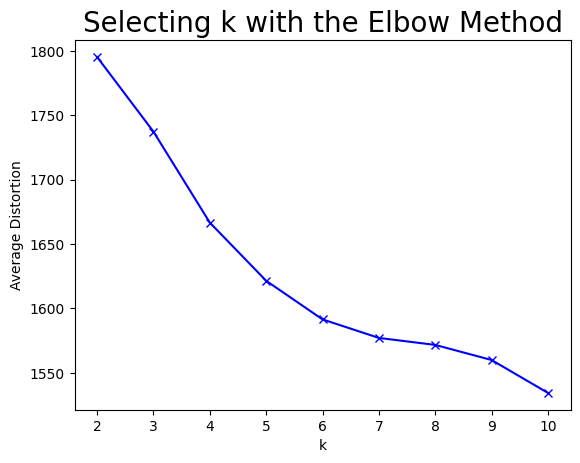

In [ ]:
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

- The appropriate value of k from the Elbow curve seems to 5.

**Let's check the silhouette scores.**

In [ ]:
sil_score = []
cluster_list = range(2, 10)

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)

    preds = clusterer.fit_predict((embedding_matrix))

    score = silhouette_score(embedding_matrix, preds)
    sil_score.append(score)

    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.04681149870157242)
For n_clusters = 3, the silhouette score is 0.04964282363653183)
For n_clusters = 4, the silhouette score is 0.060650650411844254)
For n_clusters = 5, the silhouette score is 0.06735046207904816)
For n_clusters = 6, the silhouette score is 0.06096599996089935)
For n_clusters = 7, the silhouette score is 0.05802199989557266)
For n_clusters = 8, the silhouette score is 0.053445685654878616)
For n_clusters = 9, the silhouette score is 0.05067499727010727)


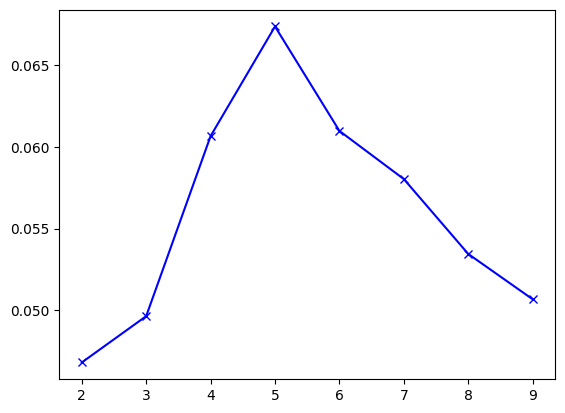

In [ ]:
plt.plot(cluster_list, sil_score, "bx-")
plt.show()

- The silhouette coefficient for 5 clusters is the highest.
- So, we will proceed with 5 clusters.

In [ ]:
# defining the number of clusters/categories
n_categories = 5

# fitting the model
kmeans = KMeans(n_clusters=n_categories, random_state=1).fit(embedding_matrix)

In [ ]:
# checking the cluster centers
centers = kmeans.cluster_centers_
centers

array([[-0.01785408,  0.00624578, -0.00339485, ..., -0.06009006,
        -0.03252156,  0.01114385],
       [ 0.00549149, -0.02162502,  0.01707269, ..., -0.03975476,
        -0.01703277,  0.01147504],
       [-0.01044314, -0.04308654, -0.0162626 , ..., -0.06730249,
        -0.00805317,  0.00465476],
       [-0.01394477, -0.03756044,  0.00739344, ..., -0.10312268,
        -0.01400102,  0.03134283],
       [-0.02824865, -0.03118994,  0.00693419, ..., -0.05258857,
         0.00538872,  0.03337952]], dtype=float32)

In [ ]:
# creating a copy of the data
clustered_data = data.copy()

# assigning the cluster/category labels
clustered_data['Category'] = kmeans.labels_

clustered_data.head(2)

,Text,Category
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n",1
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the 

Let's check a few random news articles from each of the categories.

In [ ]:
# for each cluster, printing the 5 random news articles
for i in range(2):
    print(i)
    print(clustered_data.loc[clustered_data.Category == i, 'Text'].sample(5, random_state=1).values)
    print("\n")

0
["O'Sullivan keeps his powder dry\n \n When you are gunning for glory and ultimate success keeping the gunpowder dry is essential.\n \n Ireland coach Eddie O'Sullivan appears to have done that quite successfully in the run-up to this season's Six Nations Championship. He decreed after the 2003 World Cup that players should have a decent conditioning period during the year. That became a reality at the end of last summer with a 10-week period at the start of the this season. It may have annoyed his Scottish, and in particularly Welsh, cousins who huffed and puffed at the disrespect apparently shown to the Celtic League. We will say nothing of Mike Ruddock ''poaching'' eight of the Dragons side that faced Leinster on Sunday. But, like O'Sullivan, he was well within his rights, particularly when you are talking about the national side and pride that goes along with it. The IRFU has thrown their weight behind O'Sullivan, who must be glad that in the main, there is centrally-controlled co

Based on the above news articles, we can see that they can be categorized as follows:

- 0: Technology
- 1: Sports
- 2: Politics
- 3: Entertainment
- 4: Business

In [ ]:
# dictionary of cluster label to category
category_dict = {
     0: 'Technology',
     1: 'Sports',
     2: 'Politics',
     3: 'Entertainment',
     4: 'Business'
}

# mapping cluster labels to categories
clustered_data['Category'] = clustered_data['Category'].map(category_dict)

clustered_data.head(2)

,Text,Category
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n",Sports
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers,

## **Comparing with Actual Categories**

In [ ]:
# loading the actual labels
labels = pd.read_csv("/content/drive/MyDrive/AIML_UT/Colab_Files/Pi5_NLP/W2_Transformers/news_article_labels.csv")

In [ ]:
labels.shape

(2127, 1)

In [ ]:
# checking the unique labels
labels['Label'].unique()

array(['Politics', 'Sports', 'Technology', 'Entertainment', 'Business'],
      dtype=object)

In [ ]:
# adding the actual categories to our dataframe
clustered_data['Actual Category'] = labels['Label'].values

In [ ]:
# Ensure both columns are strings before passing to classification_report
#clustered_data['Actual Category'] = clustered_data['Actual Category'].astype(str)
#clustered_data['Category'] = clustered_data['Category'].astype(str)


In [ ]:
(clustered_data['Category']== 'NaN').sum()

np.int64(0)

In [ ]:
print(classification_report(clustered_data['Actual Category'], clustered_data['Category']))
## Something wrong

               precision    recall  f1-score   support

     Business       0.05      0.04      0.04       503
Entertainment       0.01      0.01      0.01       369
     Politics       0.00      0.00      0.00       403
       Sports       0.00      0.00      0.00       505
   Technology       0.01      0.01      0.01       347

     accuracy                           0.01      2127
    macro avg       0.01      0.01      0.01      2127
 weighted avg       0.02      0.01      0.01      2127



We were able to categorize the news articles with 96% accuracy

- Note that we were able to do so WITHOUT knowing the actual labels for the news articles.

## **Analyzing Incorrect Predictions**

Let's check a few cases where our model incorrectly categorized the news articles.

In [ ]:
# creating a dataframe of incorrect categorizations
incorrect_category_data = clustered_data[clustered_data['Actual Category'] != clustered_data['Category']].copy()
incorrect_category_data.shape

(2100, 3)

In [ ]:
incorrect_category_data.head(2)

,Text,Category,Actual Category
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n",Sports,Politics
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the King

In [ ]:
idx = 24

print('Distance from Actual Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[2]], "euclidean")[0,0])

print('Distance from Predicted Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[3]], "euclidean")[0,0])

Distance from Actual Category
0.9545187438410898
Distance from Predicted Category
1.0357046646132566


We see that the distance of the particular news article from the cluster centers of the actual and predicted categories is almost similar.

In [ ]:
idx = 45

print('Distance from Actual Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[2]], "euclidean")[0,0])

print('Distance from Predicted Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[4]], "euclidean")[0,0])

Distance from Actual Category
1.019115680375396
Distance from Predicted Category
1.0080197524127197


We see that the distance of the particular news article from the cluster centers of the actual and predicted categories is almost similar.

Based on this, we can say that a better approach of categorizing these news articles would be to assign more than one category to these news article.

## **Conclusion**

We did the following in the case study:

1. Encoded the dataset using the ***all-MiniLM-L6-v2*** transformer model to generate embeddings of 384 dimensions

2. Queried the dataset to find news articles similar to the query text we passed

3. Categorized the news articles using K-Means Clustering on the transformer encodings

4. Compared the predicted categories of the news articles to the actual categories

5. Analyzed the incorrect predictions to understand where the model went wrong

- Our model can correctly categorize 96% of the news articles.

- As mentioned, one can try tagging news articles with more than one category for better categorization.

    - One can find the cluster centers to which the news article is the closest and assign one or more categories accordingly

- Another approach that can be tried out would be fine-tuning the model to this particular data with category labels (one or more than one) to try and improve the overall performance.

- In addition, the startup can use other transformer models to generate summaries of the news articles, which can provide a gist of the news content.

<font size=5 color='blue'>Power Ahead!</font>
___